In [1]:
using Plots, Statistics, NaNStatistics, LinearAlgebra, Serialization, ParticleFilters

include("./utils/import.jl")
include("./utils/figs.jl")
using .Import
using .Figs

foo
bar


In [2]:
actions = ["C1", "C2", "C3", "B1", "B2"];

In [3]:
expID = "22915_095011"
runs = 20
y = 0.99;

In [4]:
s, t, a, r = Import.get_star(expID, runs);

In [5]:
#for these experiments, all runs have the same start state & optimal action
optimal_action = Import.get_optimal_arm(s[1])

println("State:")
println(string(s[1])*"\n")
println("Optimal Action:")
println(string(optimal_action))

State:
State([0.0, 8.0, 10.0], Array{Float64}[[0.0, 0.0, 1.0], [0.6, 0.0, 0.4], [1.0, 0.0, 0.0]], [0.01, 10.0])

Optimal Action:
C1


In [6]:
typeof(a)

Vector{Vector{SubString{String}}} (alias for Array{Array{SubString{String}, 1}, 1})

In [7]:
Import.print_action_hist(a, actions)

First Action
C1:	8.0
C2:	5.0
C3:	2.0
B1:	1.0
B2:	4.0

Second Action
C1:	5.0
C2:	1.0
C3:	5.0
B1:	5.0
B2:	4.0

Third Action
C1:	3.0
C2:	4.0
C3:	9.0
B1:	3.0
B2:	1.0


In [8]:
window = 100;

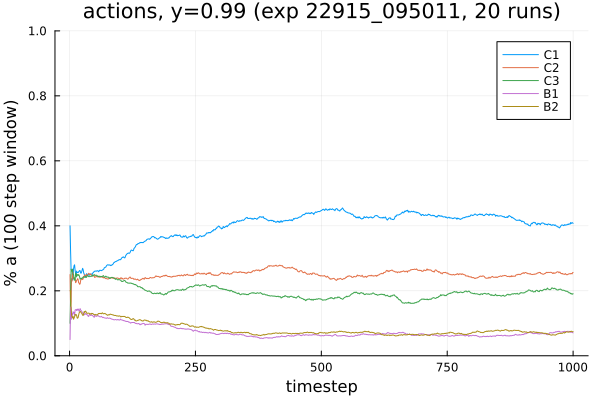

In [9]:
Figs.plot_proportion_actions_all(a, actions, window, y, expID, runs)

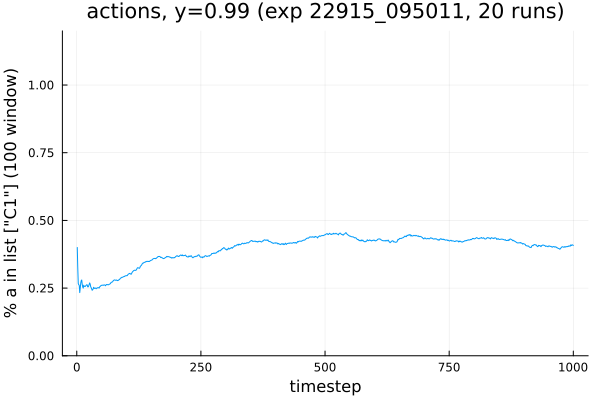

In [10]:
Figs.plot_proportion_actions_in_list_rolling(a, [optimal_action], window, y, expID)

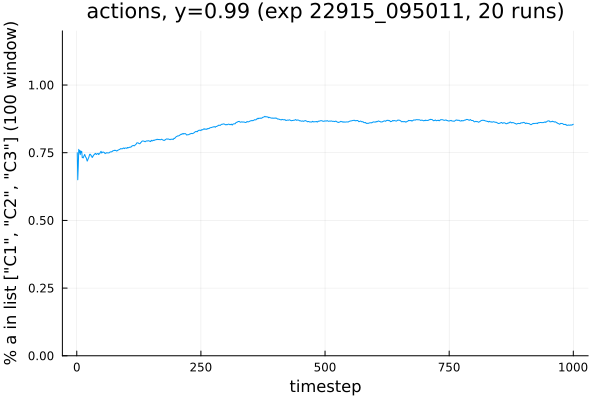

In [11]:
C_actions = ["C1", "C2", "C3"]
Figs.plot_proportion_actions_in_list_rolling(a, C_actions, window, y, expID)

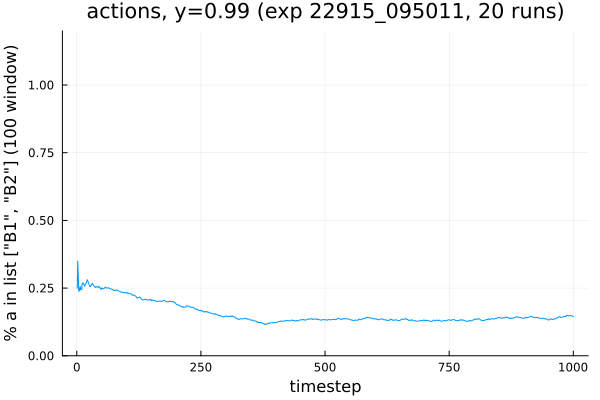

In [12]:
B_actions = ["B1", "B2"]
Figs.plot_proportion_actions_in_list_rolling(a, B_actions, window, y, expID)

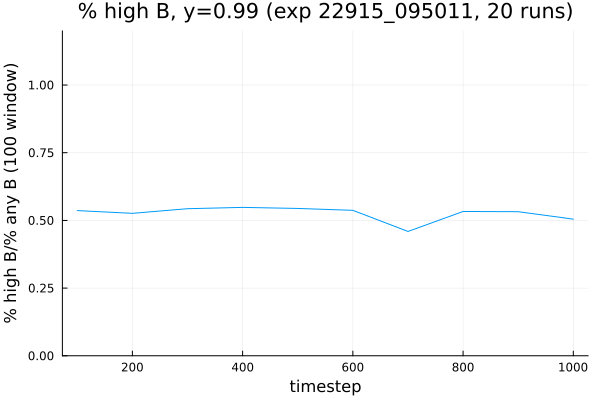

In [13]:
Figs.plot_proportion_high_B(a, window, y, expID)

In [14]:
y8_expID = "22914_23519"
y9_expID = "22915_02260"
y99_expID = "22915_095011"
y999_expID = "22927_082018"

"22927_082018"

In [15]:
@time begin
    println("importing y=0.8 (exp "*y8_expID*") data...")
    y8_s, y8_t, y8_a, y8_r, y8_beliefs, y8_final_states, y8_avg_belief, y8_avg_belief_u = Import.import_experiment(y8_expID, runs)
end;

importing y=0.8 (exp 22914_23519) data...
199.921168 seconds (1.60 G allocations: 61.357 GiB, 4.23% gc time, 0.21% compilation time)


In [16]:
@time begin
    println("importing y=0.9 (exp "*y9_expID*") data...")
    y9_s, y9_t, y9_a, y9_r, y9_beliefs, y9_final_states, y9_avg_belief, y9_avg_belief_u = Import.import_experiment(y9_expID, runs)
end;

importing y=0.9 (exp 22915_02260) data...
201.172995 seconds (1.59 G allocations: 61.247 GiB, 4.26% gc time)


In [17]:
@time begin
    println("importing y=0.99 (exp "*y99_expID*") data...")
    y99_s, y99_t, y99_a, y99_r, y99_beliefs, y99_final_states, y99_avg_belief, y99_avg_belief_u = Import.import_experiment(y99_expID, runs)
end;

importing y=0.99 (exp 22915_095011) data...
199.691517 seconds (1.59 G allocations: 61.253 GiB, 3.40% gc time)


In [ ]:
@time begin
    println("importing y=0.999 (exp "*y999_expID*") data...")
    y999_s, y999_t, y999_a, y999_r, y999_beliefs, y999_final_states, y999_avg_belief, y999_avg_belief_u = Import.import_experiment(y999_expID, runs)
end;

In [ ]:
plot(
    1:length(y8_avg_belief),
    [y8_avg_belief, y9_avg_belief, y99_avg_belief, y999_avg_belief],
    labels = ["y=0.8" "y=0.9" "y=0.99" "y=0.999"],
    title = "belief on converged state",
    legend = :bottomright
)

In [ ]:
function print_state(s::State)
    println("\t u: ", s.u)
    println("\t d1: ", s.d[1], "\t (exp val ", dot(s.u, s.d[1]), ")")
    println("\t d1: ", s.d[2], "\t (exp val ", dot(s.u, s.d[2]), ")")
    println("\t d1: ", s.d[3], "\t (exp val ", dot(s.u, s.d[3]), ")")
end

true_state = y8_s[1]

println("\ntrue state")
print_state(true_state)

println("\ny=0.8 final states")
for s in y8_final_states
    println("")
    print_state(s)
end

println("\ny=0.9 final states")
for s in y9_final_states
    println("")
    print_state(s)
end

println("\ny=0.99 final states")
for s in y99_final_states
    println("")
    print_state(s)
end

println("\ny=0.999 final states")
for s in y999_final_states
    println("")
    print_state(s)
end


In [ ]:
# NOTE: while these are almost identical, they do differ slightly
plot(
    1:length(y8_avg_belief),
    [y8_avg_belief_u, y9_avg_belief_u, y99_avg_belief_u, y999_avg_belief_u],
    labels = ["y=0.8" "y=0.9" "y=0.99" "y=0.999"],
    title = "belief on converged utility function",
    legend = :bottomright
)